## Import the required dependencies

In [2]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np

## Take a look at how many examples there are in the train and val datasets

In [3]:
train, val = pd.read_csv("HW4-Train.csv"), pd.read_csv("HW4-Validation.csv")
print(f"Number of training examples in train: {len(train)}")
print(f"Number of training examples in val: {len(val)}")

Number of training examples in train: 20000
Number of training examples in val: 3000


Instantiate the standard scaler

In [4]:
scaler = StandardScaler()

### Get rid of NaN values

In [5]:
train = train.dropna()
val = val.dropna()

states = pd.get_dummies(train['States'], dtype=float)
train = pd.concat([train, states], axis=1)
train = train.drop(columns='States')

states_val = pd.get_dummies(val['States'], dtype=float)
states_val
val = pd.concat([val, states_val], axis=1)
val = val.drop(columns='States')

In [6]:
train

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,ind_acc_XYZ,rep_income,Default_ind,AL,FL,GA,LA,MS,NC,SC
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,0.0,61000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,0.0,79000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,89198.22,15193.09,319.0,147.0,279.0,0.0,0.0,0.0,0.00,2.0,...,0.0,76000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,108936.89,14262.34,271.0,100.0,247.0,2.0,1.0,1.0,6087.16,0.0,...,0.0,68000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,84868.71,10636.64,296.0,142.0,266.0,0.0,0.0,0.0,0.00,2.0,...,1.0,74000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,113086.68,14659.19,288.0,156.0,252.0,0.0,0.0,0.0,0.00,2.0,...,0.0,91000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19994,87315.26,16335.66,290.0,142.0,239.0,0.0,0.0,0.0,0.00,0.0,...,0.0,71000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19997,107606.69,17838.79,290.0,168.0,271.0,1.0,0.0,0.0,0.00,3.0,...,0.0,63000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19998,78787.72,11447.61,208.0,104.0,194.0,0.0,0.0,0.0,0.00,1.0,...,0.0,71000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
val

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,ind_acc_XYZ,rep_income,Default_ind,AL,FL,GA,LA,MS,NC,SC
0,63651.27,9019.99,484.0,242.0,395.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,105559.29,16692.19,212.0,118.0,211.0,0.0,0.0,0.0,0.0,4.0,...,0.0,55000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,96062.99,10509.13,255.0,123.0,180.0,0.0,0.0,0.0,0.0,2.0,...,0.0,86000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,84417.40,13873.96,330.0,175.0,328.0,0.0,0.0,0.0,0.0,1.0,...,0.0,110000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,84060.13,10212.57,308.0,190.0,279.0,0.0,0.0,0.0,0.0,0.0,...,0.0,84000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,72687.90,12597.74,315.0,154.0,301.0,0.0,0.0,0.0,0.0,0.0,...,0.0,73000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2995,90748.88,11481.81,274.0,161.0,268.0,0.0,0.0,0.0,0.0,0.0,...,0.0,76000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2996,101930.98,15242.30,243.0,161.0,213.0,0.0,0.0,0.0,0.0,2.0,...,0.0,65000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,74738.73,12175.49,351.0,179.0,271.0,0.0,0.0,0.0,0.0,2.0,...,0.0,85000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Convert states to one hot encodings since there are only a few possible values

In [8]:
columns_to_scale = ['tot_credit_debt', 'avg_card_debt', 'credit_age', 'credit_good_age', 'card_age', 'non_mtg_acc_past_due_12_months_num', 'non_mtg_acc_past_due_6_months_num', 'mortgages_past_due_6_months_num', 'credit_past_due_amount', 'inq_12_month_num', 'card_inq_24_month_num', 'card_open_36_month_num', 'auto_open_ 36_month_num', 'uti_card', 'uti_50plus_pct', 'uti_max_credit_line', 'uti_card_50plus_pct', 'rep_income']
remaining_columns = ['ind_acc_XYZ', 'AL', 'FL', 'GA', 'LA', 'MS', 'NC', 'SC', 'Default_ind']
scaled_train_columns = scaler.fit_transform(train[columns_to_scale])
scaled_val_columns = scaler.fit_transform(val[columns_to_scale])

scaled_train_np = np.concatenate([scaled_train_columns, train[remaining_columns]], axis=1)
scaled_val_np = np.concatenate([scaled_val_columns, val[remaining_columns]], axis=1)
scaled_train = pd.DataFrame(scaled_train_np, columns=columns_to_scale + remaining_columns)
scaled_val = pd.DataFrame(scaled_val_np, columns=columns_to_scale + remaining_columns)

## Store the label in the y vector and remove it from the X matrix

In [9]:
y_train = scaled_train['Default_ind']
X_train = scaled_train.drop(columns='Default_ind')

In [10]:
y_val = scaled_val['Default_ind']
X_val = scaled_val.drop(columns='Default_ind')

## Dummy baseline

This baseline is a dummy classifier. The dummy classifier chooses the majority class each time (here there are more '0' labels so it always predicts 0). We assess our metrics for this dummy baseline as a starting point.

In [11]:
majority_baseline = DummyClassifier(strategy="most_frequent")
majority_baseline.fit(X_train, y_train)
dummy_y_hat = majority_baseline.predict(X_val)
print(f"Majority class dummy baseline classifier accuracy: {accuracy_score(y_val, dummy_y_hat)}")
print(f"Majority class dummy baseline classifier F1: {f1_score(y_val, dummy_y_hat)}")
# Zero division accounts for the possibility that the denominator of the precision is zero, which is true here.
print(f"Majority class dummy baseline classifier precision: {precision_score(y_val, dummy_y_hat, zero_division=0.0)}")
print(f"Majority class dummy baseline classifier recall: {recall_score(y_val, dummy_y_hat)}")

Majority class dummy baseline classifier accuracy: 0.9260008087343308
Majority class dummy baseline classifier F1: 0.0
Majority class dummy baseline classifier precision: 0.0
Majority class dummy baseline classifier recall: 0.0


## Confusion Matrix

It looks like the dummy classifier has 92% accuracy. So accuracy is not a good measure of how "good" the model is doing. We will consider the other metrics (F1, precision, recall) for our task.

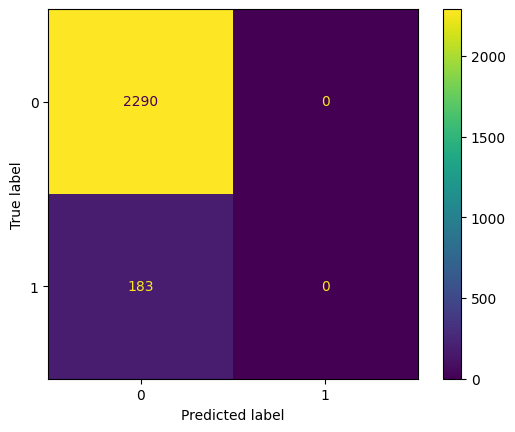

In [12]:
dummy_cm = confusion_matrix(y_val, dummy_y_hat)
dummy_displ = ConfusionMatrixDisplay(confusion_matrix=dummy_cm)
dummy_displ.plot()

## Logistic Regression
We will now fit a logistic regression model to our data with the random state of 42.

In [13]:
lr_clf = LogisticRegression(random_state=42)

lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Make predictions

In [14]:
y_hat = lr_clf.predict(X_val)

## Logistic Regression Evaluation

In [15]:
print(f"Logistic regression model accuracy: {accuracy_score(y_val, y_hat)}")
print(f"Logistic regression model F1: {f1_score(y_val, y_hat)}")
print(f"Logistic regression model precision: {precision_score(y_val, y_hat)}")
print(f"Logistic regression model recall: {recall_score(y_val, y_hat)}")

Logistic regression model accuracy: 0.9413667610190053
Logistic regression model F1: 0.4357976653696498
Logistic regression model precision: 0.7567567567567568
Logistic regression model recall: 0.30601092896174864


## Logistic Regression Confusion Matrix

We are doing much better than with the dummy, but improvements can still be made. The precision and recall should be closer to one another to balance out false positives and false negatives.

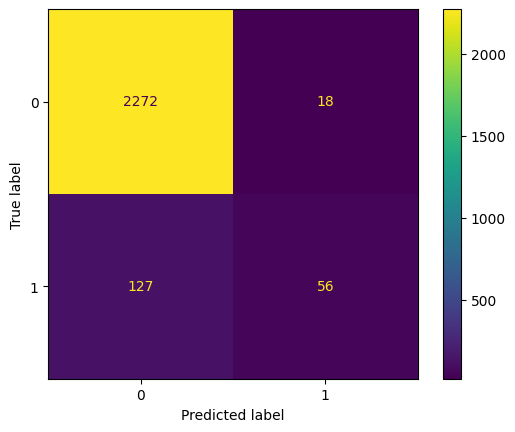

In [16]:
cm = confusion_matrix(y_val, y_hat)
displ = ConfusionMatrixDisplay(confusion_matrix=cm)
displ.plot()

## Gradient Boosted Method

Let's train a model using a gradient boosting classifier (vanilla gradient boosted method) in order to make better predictions. We can increase the number of estimators to improve performance.

In [21]:
gbm_clf = GradientBoostingClassifier(random_state=42, n_estimators=1000)

gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

### Gradient Boosted Predictions

In [22]:
gbm_y_hat = gbm_clf.predict(X_val)

print(f"Gradient Boosting Accuracy: {accuracy_score(y_val, gbm_y_hat)}")
print(f"Gradient Boosting F1 Score: {f1_score(y_val, gbm_y_hat)}")
print(f"Gradient Boosting precision Score: {precision_score(y_val, gbm_y_hat)}")
print(f"Gradient Boosting recall Score: {recall_score(y_val, gbm_y_hat)}")

Gradient Boosting Accuracy: 0.9357056207035989
Gradient Boosting F1 Score: 0.4717607973421927
Gradient Boosting precision Score: 0.6016949152542372
Gradient Boosting recall Score: 0.3879781420765027


## Gradient Boosted Confusion Matrix

This looks much better. Our F1 is higher than with logistic regression (and MUCH higher than the dummy)! So things look good. Our precision and recall are also moving towards convergence, finding a better balance with misclassifications.

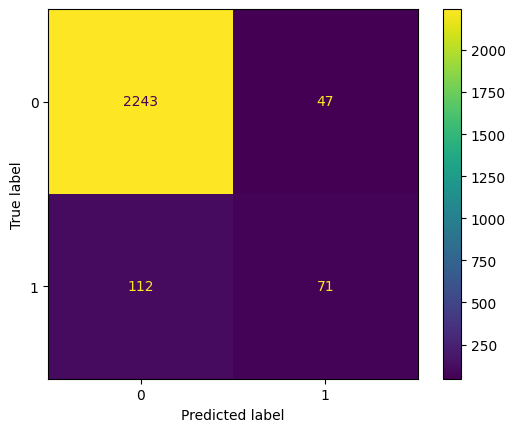

In [23]:
gbm_cm = confusion_matrix(y_val, gbm_y_hat)
gbm_displ = ConfusionMatrixDisplay(confusion_matrix=gbm_cm)
gbm_displ.plot()

## Random Forest Comparison

It is shown below that random forest with the same number of estimators does not perform as well as the gradient boosted method.

In [27]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=200)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [28]:
rf_y_hat = rf_clf.predict(X_val)

print(f"Random Forest Accuracy: {accuracy_score(y_val, rf_y_hat)}")
print(f"Random Forest F1 Score: {f1_score(y_val, rf_y_hat)}")
print(f"Random Forest precision Score: {precision_score(y_val, rf_y_hat)}")
print(f"Random Forest recall Score: {recall_score(y_val, rf_y_hat)}")

Random Forest Accuracy: 0.9397492923574605
Random Forest F1 Score: 0.42023346303501946
Random Forest precision Score: 0.7297297297297297
Random Forest recall Score: 0.29508196721311475


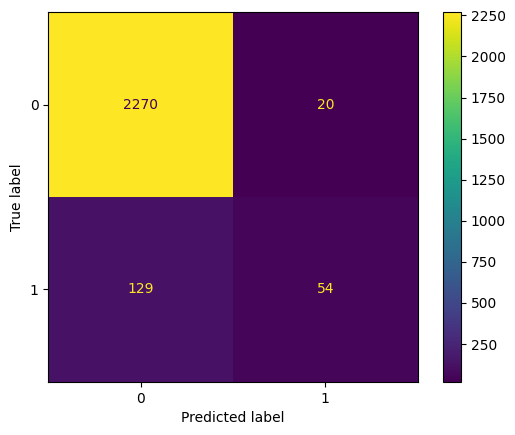

In [29]:
rf_cm = confusion_matrix(y_val, rf_y_hat)
rf_displ = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_displ.plot()

## Customer Favoring Analysis

We will now isolate the customers with accounts and make predictions on that subset to see if there is any favorable treatment.

In [19]:
scaled_val_has_account = scaled_val[scaled_val['ind_acc_XYZ'] == 1.0]
scaled_val_has_account

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,rep_income,ind_acc_XYZ,AL,FL,GA,LA,MS,NC,SC,Default_ind
15,-0.420393,-0.043474,0.675954,-0.144440,0.796717,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,-1.589632,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16,1.943504,0.459368,-0.615573,-0.702666,-0.165139,-0.272193,-0.176912,-0.18519,-0.164557,0.864691,...,1.196404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,1.527065,0.278890,-0.041561,0.709318,0.187542,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,0.246619,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31,0.118768,0.062768,-0.663407,-0.702666,-1.912509,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,1.069766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,-0.376719,-0.618113,-0.057506,0.348113,-0.181170,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,1.006447,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,-0.393987,-0.016474,0.420838,-0.144440,-0.437664,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,-0.893123,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2455,0.644130,0.496409,-0.392346,-0.702666,-0.197200,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,-0.006657,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2456,1.592128,0.399728,0.500562,-0.275787,0.251665,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,1.133085,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2464,-0.523233,-0.087669,-0.663407,-1.293729,-0.389572,-0.272193,-0.176912,-0.18519,-0.164557,0.127827,...,-0.703166,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
has_account_y = scaled_val_has_account['Default_ind']
has_account_X = scaled_val_has_account.drop(columns='Default_ind')
has_account_X

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,uti_card_50plus_pct,rep_income,ind_acc_XYZ,AL,FL,GA,LA,MS,NC,SC
15,-0.420393,-0.043474,0.675954,-0.144440,0.796717,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,0.451319,-1.589632,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,1.943504,0.459368,-0.615573,-0.702666,-0.165139,-0.272193,-0.176912,-0.18519,-0.164557,0.864691,...,-1.599586,1.196404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28,1.527065,0.278890,-0.041561,0.709318,0.187542,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,0.623504,0.246619,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31,0.118768,0.062768,-0.663407,-0.702666,-1.912509,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,-0.953682,1.069766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36,-0.376719,-0.618113,-0.057506,0.348113,-0.181170,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,-1.439843,1.006447,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,-0.393987,-0.016474,0.420838,-0.144440,-0.437664,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,0.236090,-0.893123,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2455,0.644130,0.496409,-0.392346,-0.702666,-0.197200,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,-1.040278,-0.006657,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2456,1.592128,0.399728,0.500562,-0.275787,0.251665,-0.272193,-0.176912,-0.18519,-0.164557,-0.609038,...,-0.434565,1.133085,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2464,-0.523233,-0.087669,-0.663407,-1.293729,-0.389572,-0.272193,-0.176912,-0.18519,-0.164557,0.127827,...,-0.112700,-0.703166,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### We make the predictions

In [21]:
has_account_predictions = gbm_clf.predict(has_account_X)

### We examine what portion of customers had a default

In [22]:
print(has_account_y.value_counts())

Default_ind
0.0    606
1.0     40
Name: count, dtype: int64


#### We compare this with the prediction. There is a lower number of predicted defaults, but this could also be due to other factors.

In [23]:
print(pd.DataFrame(has_account_predictions).value_counts())

0  
0.0    621
1.0     25
Name: count, dtype: int64


## Income analysis

It seems that customers who have an account at this bank have a higher income than customers who do not (in our data). Lower income may indicate a higher risk of default (https://www.pewtrusts.org/en/research-and-analysis/data-visualizations/2024/who-experiences-default). So we conclude that other factors may influence the prediction more than the simple account indicator.

In [24]:
has_account = val[val['ind_acc_XYZ'] == 1.0]
print(f"Average income of someone with an account at the bank: {np.mean(has_account['rep_income'])}")
print(f"Average income of someone without an account at the bank: {np.mean(val[val['ind_acc_XYZ'] == 0.0]['rep_income'])}")
print(f"Average income of someone who defaulted: {np.mean(val[val['Default_ind'] == 1.0]['rep_income'])}")

Average income of someone with an account at the bank: 83506.1919504644
Average income of someone without an account at the bank: 82963.32785987959
Average income of someone who defaulted: 82628.41530054645
